In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d = np.array([-0.31,-0.67,-2.07,-1.31])

In [3]:
d

array([-0.31, -0.67, -2.07, -1.31])

In [4]:
r = sp.stats.ttest_1samp(d,0)

In [5]:
r

Ttest_1sampResult(statistic=-2.8193846007963956, pvalue=0.0667723304670584)

statistic 은 t 값이다

In [6]:
r.pvalue

0.0667723304670584

In [7]:
d = np.array([-0.31,-0.67,-0.61,-2.07,-1.31])
r = sp.stats.ttest_1samp(d,0)
r.pvalue

0.03415782015509721

In [8]:
r = sp.stats.ttest_1samp(d,-1)

In [9]:
r.pvalue

0.9856916281940683

In [ ]:
###########################################################
# one-sample t-test
###########################################################

d = np.array([-0.31,-0.67,-0.61,-2.07,-1.31])
r = sp.stats.ttest_1samp(d,0)
r.pvalue

# data01_iris.csv 에서 setosa 품종의 평균 Sepal Length가 4가 아니라는 
# 가설에 대한 p-value를 구하시오.

In [10]:
pr = pd.read_csv('data01_iris.csv')

In [11]:
pr.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
idx = (pr['Species']=='setosa')

In [22]:
pr1 = pr[idx]

In [28]:
pr1.shape

(50, 5)

In [24]:
d = np.array(pr1['Sepal.Length'])

In [25]:
r = sp.stats.ttest_1samp(d,4)

In [26]:
r.pvalue

2.1744423549228063e-25

p value 가 2.17 * 10 -25승이므로 매우 작은 수이므로 기각된다.

In [51]:
np.random.seed(1) # 랜덤의 시드가 같을 경우 랜덤 결과값은 같아진다.
x1 = np.random.normal(0.5,1,10)
x2 = np.random.normal(-0.5,1,10)
r = sp.stats.ttest_ind(x1,x2)
r.pvalue

0.05314777655637554

In [52]:
x2

array([ 0.96210794, -2.56014071, -0.8224172 , -0.88405435,  0.63376944,
       -1.59989127, -0.67242821, -1.37785842, -0.45778625,  0.08281521])

In [53]:
x1

array([ 2.12434536, -0.11175641, -0.02817175, -0.57296862,  1.36540763,
       -1.8015387 ,  2.24481176, -0.2612069 ,  0.8190391 ,  0.25062962])

In [54]:
r = sp.stats.ttest_ind(x1, x2)

In [55]:
r

Ttest_indResult(statistic=2.069674816460064, pvalue=0.05314777655637554)

In [57]:
iris = pd.read_csv('data01_iris.csv')

In [58]:
iris1 = iris[ iris['Species']=='versicolor' ]
iris2 = iris[ iris['Species']=='setosa' ]
sp.stats.ttest_ind(iris1['Sepal.Length'],iris2['Sepal.Length'])

Ttest_indResult(statistic=10.52098626754911, pvalue=8.985235037487077e-18)

In [59]:
# what is the p-value between Petal Length of versicolor and virginica 
# for samples of which Petal Length > 4

In [67]:
idx3 = (iris['Species'] == 'versicolor') & (iris['Petal.Length']>4)
idx4 = (iris['Species'] == 'virginica') & (iris['Petal.Length']>4)

In [68]:
iris3 = iris[idx3]
iris4 = iris[idx4]

In [69]:
iris3.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor


In [70]:
sp.stats.ttest_ind(iris3['Petal.Length'],iris4['Petal.Length'])

Ttest_indResult(statistic=-10.155865179743653, pvalue=3.6764446310089885e-16)

In [71]:
np.random.seed(2)
z = np.random.normal(0,1,5)
x = 1*z + np.random.normal(0,1,5)
y = 1*z + np.random.normal(0,1,5)


In [72]:
%matplotlib inline

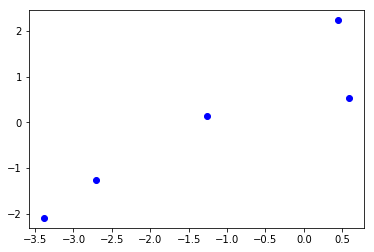

In [74]:
plt.plot(x,y,'bo')

In [75]:
r = sp.stats.pearsonr(x,y)

In [76]:
r

(0.9176900830682015, 0.027994722204480432)

In [77]:
x

array([-1.25850521,  0.44661459, -3.38148418,  0.58231859, -2.7024432 ])

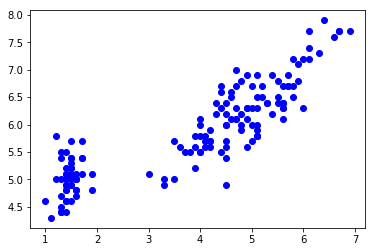

In [84]:
plt.plot(iris['Petal.Length'],iris['Sepal.Length'], 'bo')

In [85]:
sp.stats.pearsonr(iris['Petal.Length'],iris['Sepal.Length'])

(0.8717537758865832, 1.0386674194497583e-47)

##(correlation, p-value)
0이 아니므로 종속관계가 있다는 가설, p밸류가 낮으므로 유의미하다(가설이 맞다고 여겨진다)

In [87]:
# what is the correlation and p-value between Sepal Length and Petal Width of setosa?

In [88]:
inx5 = iris['Species'] == 'setosa'

In [89]:
np.random.seed(3)
w = 3
z = np.random.normal(0,1,20)
x = w*z + np.random.normal(0,1,20)
y = w*z + np.random.normal(0,1,20)
x2 = pd.cut(x,3)
y2 = pd.cut(y,3)

In [90]:
x2

[(1.199, 4.63], (-2.232, 1.199], (1.199, 4.63], (-5.674, -2.232], (-2.232, 1.199], ..., (-5.674, -2.232], (-5.674, -2.232], (-5.674, -2.232], (1.199, 4.63], (-5.674, -2.232]]
Length: 20
Categories (3, interval[float64]): [(-5.674, -2.232] < (-2.232, 1.199] < (1.199, 4.63]]

In [94]:
x2.shape

(20,)

In [100]:
x = pd.cut(iris['Sepal.Width'],5)
y = iris['Species']
tbl = pd.crosstab(x,y)
sp.stats.chisquare(tbl,axis=None)

Power_divergenceResult(statistic=156.6, pvalue=3.4207367649929005e-26)

In [101]:
tbl

Species,setosa,versicolor,virginica
Sepal.Width,,,
"(1.998, 2.48]",1,9,1
"(2.48, 2.96]",1,25,20
"(2.96, 3.44]",26,16,26
"(3.44, 3.92]",18,0,3
"(3.92, 4.4]",4,0,0


In [97]:
type(tbl)

pandas.core.frame.DataFrame

In [98]:
tbl.shape

(3, 3)

In [99]:
x

0        (2.8, 3.6]
1        (2.8, 3.6]
2        (2.8, 3.6]
3        (2.8, 3.6]
4        (2.8, 3.6]
5        (3.6, 4.4]
6        (2.8, 3.6]
7        (2.8, 3.6]
8        (2.8, 3.6]
9        (2.8, 3.6]
10       (3.6, 4.4]
11       (2.8, 3.6]
12       (2.8, 3.6]
13       (2.8, 3.6]
14       (3.6, 4.4]
15       (3.6, 4.4]
16       (3.6, 4.4]
17       (2.8, 3.6]
18       (3.6, 4.4]
19       (3.6, 4.4]
20       (2.8, 3.6]
21       (3.6, 4.4]
22       (2.8, 3.6]
23       (2.8, 3.6]
24       (2.8, 3.6]
25       (2.8, 3.6]
26       (2.8, 3.6]
27       (2.8, 3.6]
28       (2.8, 3.6]
29       (2.8, 3.6]
           ...     
120      (2.8, 3.6]
121    (1.998, 2.8]
122    (1.998, 2.8]
123    (1.998, 2.8]
124      (2.8, 3.6]
125      (2.8, 3.6]
126    (1.998, 2.8]
127      (2.8, 3.6]
128    (1.998, 2.8]
129      (2.8, 3.6]
130    (1.998, 2.8]
131      (3.6, 4.4]
132    (1.998, 2.8]
133    (1.998, 2.8]
134    (1.998, 2.8]
135      (2.8, 3.6]
136      (2.8, 3.6]
137      (2.8, 3.6]
138      (2.8, 3.6]


In [102]:
# Sepal.Width와 Petal.Length를 pd.cut을 이용하여 level 4개짜리 
# 범주형 데이터로 변형한 후 chi-square test를 하셔서 
# pvalue를 구하시오. 

In [103]:
x = pd.cut(iris['Sepal.Width'], 4)

In [104]:
y = pd.cut(iris['Petal.Length'],4)

In [105]:
tbl = pd.crosstab(x,y)

In [106]:
tbl

Petal.Length,"(0.994, 2.475]","(2.475, 3.95]","(3.95, 5.425]","(5.425, 6.9]"
Sepal.Width,,,,
"(1.998, 2.6]",1,8,12,3
"(2.6, 3.2]",16,3,46,18
"(3.2, 3.8]",27,0,3,7
"(3.8, 4.4]",6,0,0,0


In [107]:
sp.stats.chisquare(tbl,axis=None)

Power_divergenceResult(statistic=249.57333333333335, pvalue=1.5199658015681152e-44)